# Calculus Refresher

In this notebook we will review fundamental concepts in calculus

In [1]:
## Written in Python 3.x
import numpy as np
import math
from matplotlib import pyplot as plt

#### Calculus: "inventing" a set of symbols, operations, and rules, so we can work with smooth and continuous objects

### 1. Limit and derivative

In many real world situations we want to know the rate of a process.

**Example:** A bacterial population in a petri dish is growing without control. If you are a microbiologist that knows how to count bacteria, you want to know how fast they are growing, what would be the simplest experiment to do?

Measure population size $y_1$ at time $t_1$, and population size $y_2$ at time $t_2$, then take the ratio:

$$
\mathrm{rate} \approx \frac{y_2-y_1}{t_2-t_1}
$$

If $t_2$ and $t_1$ are sufficiently close, the rate could be interpretted as an instantaneous rate:

$$
\mathrm{Instantaneous\;rate\;at\;}t_1: \lim_{t_2\to t_1} \frac{y_2-y_1}{t_2-t_1}
$$

Instantaneous rate is the intuition for **derivative**:

$$
\mathrm{Instantaneous\;rate\;at\;}t: y'(t) = \lim_{\Delta t\to 0} \frac{y(t+\Delta t)-y(t)}{\Delta t}
$$

**Reversed example:** Suppose you are a math student and do not know how to count bacteria, but you know the **functional form** of bacterial growth, which happened to be exponential: 

$$
y(t)=e^t
$$

The population size is $1$ at time $0$, and is $e^t$ at time $t$. What is the growth rate at time $0$?

To solve the problem, we need to solve:
$$
y'(0)=\lim_{t\to 0} \frac{e^t-1}{t-0} = ?
$$

In [18]:
## we can use python to plot this function and just eye-balling the result

n = np.arange(1,100,0.1)
y = []
for i in n:
    x = 1/i
    y.append((np.exp(x)-1)/x)

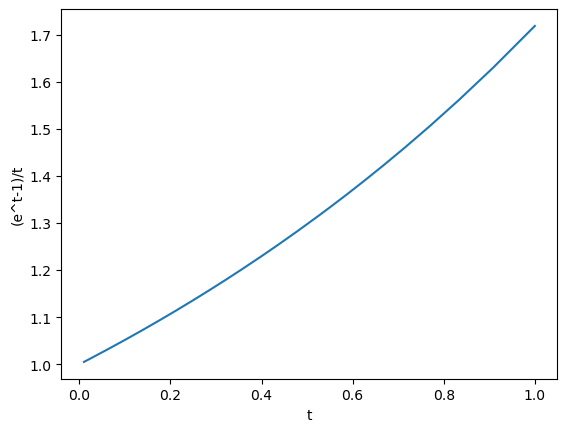

In [21]:
plt.plot(1/n,y)
plt.xlabel("t")
plt.ylabel("(e^t-1)/t")
plt.show()

**Analytical rules for derivatives**

Algebraic rules:
$$
\begin{align*}
(f+g)' & = f' + g'\\
(fg)' &= f'g + g'f\\
\left(\frac{f}{g}\right)'&=\frac{f'g-g'f}{g^2}\\
\end{align*}
$$

The chain rule:
$$
\begin{align*}
f(g(x))' = f'(g(x)) g'(x)
\end{align*}
$$

Change of variables (we use another derivative symbol):
$$
\begin{align*}
y'(x)=\frac{dy}{dx} = \frac{dy}{du}\frac{du}{dx}=y'(u)u'(x)
\end{align*}
$$

**In many cases, the analytical form of a function's derivative is known:**

$$
\begin{align*}
(x^a)' &= ax^{a-1}\\
(a^x)' &= a^x\ln a\\
(\log_a x)' &=\frac{1}{x \ln a}\\
\end{align*}
$$

(Ask Google)

In the bacterial growth example, since $y(t)=e^t$, we immediately know that $y'(t)=e^t$, and so $y'(0)=1$. This does not require us to directly compute the limit.

### 2. Taylor expansion

Taylor expansion is the first tool we encounter that allows us to locally approximate a function.

The basic form is to approximate a *differentiable* function using the sum of polynomials:

$$
y(x) = y(x_0) + y'(x_0)(x-x_0) + \frac{1}{2}y''(x_0)(x-x_0)^2 + \cdots + \frac{1}{n!}f^{(n)}(x_0)(x-x_0)^n +\cdots
$$

Let's approximate $y=e^x$ near $x_0=0$

In [70]:
## approximate up to order n
def partial_sum(n,x):
    return np.sum([(x**i)/math.factorial(i) for i in range(n+1)])

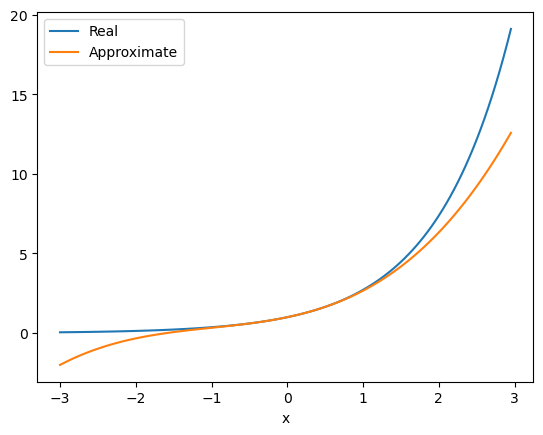

In [72]:
n = 3
X = np.arange(-3,3,0.05)
Y_approx = []
Y_real = []
for x in X:
    
    Y_real.append(np.exp(x))
    Y_approx.append(partial_sum(n,x))
    
plt.plot(X,Y_real)
plt.plot(X,Y_approx)
plt.xlabel("x")
plt.legend(["Real","Approximate"])
plt.show()

Next example is about $\sin(x)$

$$
\sin(x)=x-\frac{x^3}{3!} + \frac{x^5}{5!} -\frac{x^7}{7!}\cdots
$$

In [62]:
## approximate up to order n
def partial_sum(n,x):
    return np.sum([(-1)**i*(x**(2*i+1))/math.factorial(2*i+1) for i in range(n+1)])

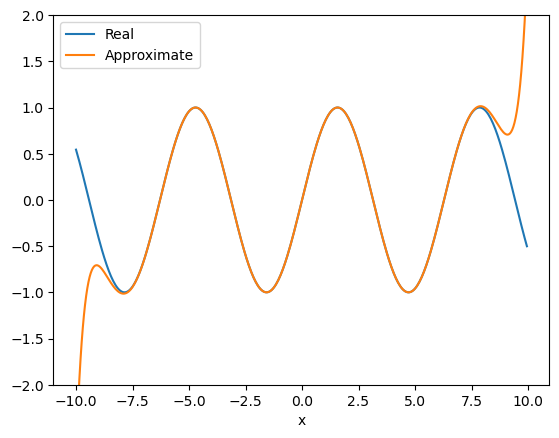

In [69]:
n = 10
X = np.arange(-10,10,0.05)
Y_approx = []
Y_real = []
for x in X:
    
    Y_real.append(np.sin(x))
    Y_approx.append(partial_sum(n,x))
    
plt.plot(X,Y_real)
plt.plot(X,Y_approx)
plt.xlabel("x")
plt.ylim([-2,2])
plt.legend(["Real","Approximate"])
plt.show()

Taylor series is very useful. Let's go back to the bacterial growth problem and directly calculate the limit

$$
y'(0)=\lim_{t\to 0} \frac{e^t-1}{t-0}
$$

\[Work on the black board\]

### 3. Integral

**Definite integral** is the summation of many many infinitely small parts

A fundamental relation in Calculus:

$$
\int_a^b f(x)dx = F(b)-F(a)
$$

where $f(x)$ is the derivative of $F(x)$

Example: What's the average population size of bacteria that have ever existed up to time $t$ in the exponential growth process?

$$
\frac{1}{t}\int_0^t e^x dx = \frac{e^t-1}{t}
$$

**Techniques and rules of integration**

Linearity:

$$
\int_a^b [c_1 f(x) + c_2 g(x)] dx = c_1 \int_a^b f(x)dx + c_2 \int_a^b g(x)dx
$$

Integration by part:

$$
\int_a^b f(x)g(x) dx = \int_a^b f(x) dG(x) = f(x)G(x)\big|_{a}^b - \int_a^b G(x) df(x)
$$

Exchanging differentiation and integration with respect to different variables is OK *in most cases*:

$$
\frac{d}{dy}\int_a^b f(x,y) dx = \int_a^b \left[\frac{d}{dy} f(x,y)\right] dx
$$

You can also integrate an infinite series *in most cases*:

$$
\int_a^b (f_1(x)+f_2(x)+\cdots) dx = \int_a^b f_1(x)dx + \int_a^b f_2(x)dx + \cdots
$$

### 4. Differential equations

DEquations describe the local behavior of a system

**Bacteria example revisited.** How do you convince your experimentalist colleague that the exponential function is indeed the growth curve for bacteria?

Every model comes with assumptions: each bacteria individual divides with a fixed rate $r$, so in a small time window $\Delta t$, approximately a fraction $r\Delta t$ of the population divide. Further, assume they are immortal. Then

$$
y(t+\Delta t)\approx y(t) + r\Delta t y(t) 
$$

This is equivalent to say that
$$
\frac{y(t+\Delta t)-y(t)}{\Delta t}\approx r y(t)
$$
HAS TO BE TRUE FOR ALL $t$. 

Now, what function $y(t)$ satisfies this relationship for all $t$? 

We take $\Delta t\to 0$, which gives us $y'(t)=ry(t)$. This is one of the simplest differential equations.

To solve differential equations, there are complex rules and tools, but simple ones are easy to handle:

$$
\frac{dy}{dt}=ry \Rightarrow \frac{dy}{y}=rdt \Rightarrow \int \frac{dy}{y} = \int rdt
$$

Working out the integral, we have

$$
\ln y = rt + C \Rightarrow y=Ce^{rt} 
$$

Now your experimentalist colleague finally sees where the exponential function comes from. He can now measure $y$ and $t$ at different time points and get an estimate of parameters $C$ and $r$.